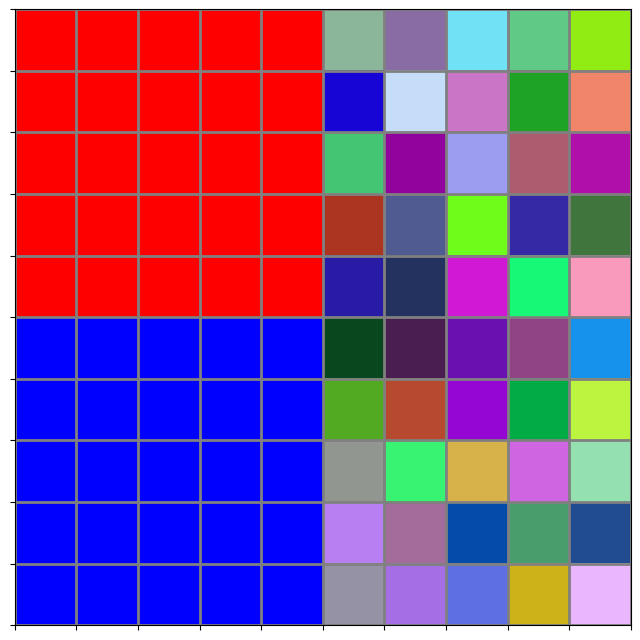

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid
grid_size = 10
square = np.zeros((grid_size, grid_size, 3))

# Fill 25% of the grid with two different colors: red and blue
square[:grid_size//2, :grid_size//2, :] = [1, 0, 0]  # Red color
square[grid_size//2:, :grid_size//2, :] = [0, 0, 1]  # Blue color

# Fill the remaining 50% with different colors
np.random.seed(0)  # For reproducibility
for i in range(grid_size):
    for j in range(grid_size//2, grid_size):
        square[i, j, :] = np.random.rand(3)

# Plotting the square
plt.figure(figsize=(8, 8))
plt.imshow(square, interpolation='none')
plt.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=2)
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.show()



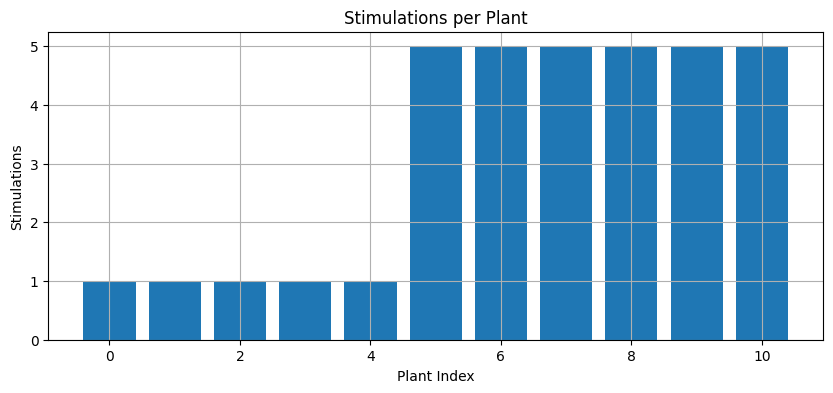

Randomized stimulation sequence (group indices): [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [1]:
""""create the probablity distribution of group stimulation"""

import matplotlib.pyplot as plt
import numpy as np

def distribute_stimulations(n_plants, group_sizes, subgroup_sizes, total_stims, compensation=5):
    """
    Distributes stimulations across plant groups with subgroup compensation and geometric weights.
    
    Parameters:
        n_plants (int): Total number of plants.
        group_sizes (list[int]): Sizes of major groups.
        subgroup_sizes (list[int or None]): Subgroup size per group, or None.
        total_stims (int): Total number of stimulations to distribute.
        compensation (int): Extra stimulations per plant in subgrouped groups.

    Returns:
        stim_per_plant (list[int]): Stimulations assigned to each plant.
        stim_sequence (list[int]): Randomized stimulation sequence by group index.
    """
    assert sum(group_sizes) == n_plants, "Sum of group sizes must equal total number of plants."
    assert len(group_sizes) == len(subgroup_sizes), "Each group must have a corresponding subgroup size (or None)."

    # Step 1: Compute geometric weights (e.g. [16, 8, 4, 2] for 4 groups)
    n_groups = len(group_sizes)
    weights = [2**(n_groups - i - 1) for i in range(n_groups)]
    total_weighted = sum(w * s for w, s in zip(weights, group_sizes))
    
    # Step 2: Compute stimulations per group
    group_stims = [int(total_stims * (w * s) / total_weighted) for w, s in zip(weights, group_sizes)]

    # Step 3: Assign stimulations per plant
    stim_per_plant = []
    stim_per_group = []
    for i, size in enumerate(group_sizes):
        if subgroup_sizes[i] is not None:
            if size % subgroup_sizes[i] != 0:
                raise ValueError(f"Group {i} size is not divisible by its subgroup size.")
            stim = group_stims[i] // size + compensation
        else:
            stim = group_stims[i] // size
        stim_per_plant.extend([stim] * size)
        stim_per_group.append(stim * size)

    # Step 4: Plotting
    plt.figure(figsize=(10, 4))
    plt.bar(range(n_plants), stim_per_plant)
    plt.xlabel("Plant Index")
    plt.ylabel("Stimulations")
    plt.title("Stimulations per Plant")
    plt.grid(True)
    plt.show()

    # Step 5: Create randomized stimulation sequence based on group weights
    total_assigned_stims = sum(stim_per_group)
    group_probs = np.array(stim_per_group) / total_assigned_stims
    stim_sequence = list(np.random.choice(range(n_groups), size=total_stims, p=group_probs))
    print("Randomized stimulation sequence (group indices):", stim_sequence)

    return stim_per_plant, stim_sequence


# Example usage
stim_per_plant, stim_sequence = distribute_stimulations(
    n_plants=11,
    group_sizes=[5, 6],
    subgroup_sizes=[None, 2],
    total_stims=15,
    compensation=5
)


In [2]:
# length of a list
sequence = [[32, 28, 34, 20, 9, 38, 1, 16, 33], 
            [35, 30, 18, 7, 5, 31, 17, 15, 25], 
            [11, 22, 26, 2, 36, 3, 27, 21, 14], 
            [39, 23, 19, 8, 4, 24, 37, 12, 6], 
            [10, 13, 29]]
print(len(sequence))

5


<BarContainer object of 10 artists>

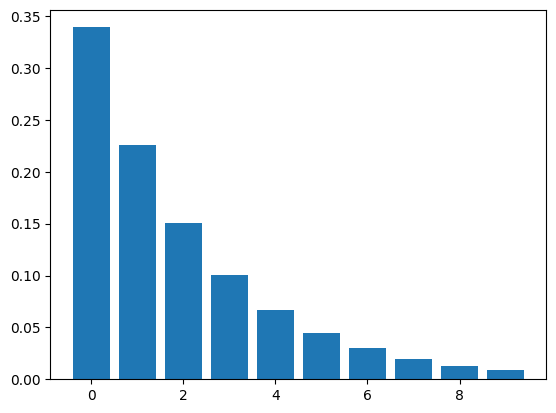

In [ ]:
""" Calculate the probability of ngroups to appear based on the probability_ratio. The first group 
appears with high probability and the probability decreases by probability ratio for the following groups."""
import matplotlib.pyplot as plt


<BarContainer object of 10 artists>

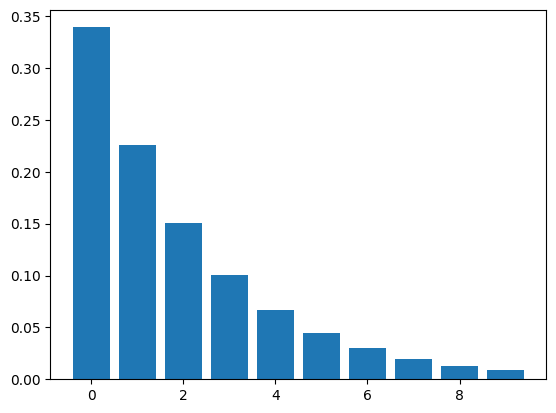

In [3]:
from calculateProbabilities import calculateRatioProbabilities
import matplotlib.pyplot as plt

n = 10
r = 1.5
#print(calculate_probabilities(n,r))
# bar plot the probabilities
plt.bar(range(n), calculate_probabilities(n, r))

number of all groups:  21
Group 0: [3, 12, 11, 0, 9, 14, 5, 4, 16, 7, 13, 6, 2, 10, 19, 18, 8, 1, 17, 15] - Probability: 0.200
Group 1: [35, 30, 33, 25, 36, 38, 32, 27, 34, 20, 29, 24, 31, 22, 37, 21, 39, 23, 26, 28] - Probability: 0.133
Group 2: [52, 44, 57, 42, 46, 43, 55, 58, 50, 51, 56, 59, 48, 53, 45, 54, 49, 40, 47, 41] - Probability: 0.089
Group 3: [63, 61, 62, 74, 67, 78, 73, 77, 75, 71, 66, 69, 79, 65, 64, 72, 70, 60, 76, 68] - Probability: 0.059
Group 4: [86, 80, 99, 97, 89, 88, 96, 94, 83, 92, 87, 98, 85, 95, 91, 90, 84, 93, 81, 82] - Probability: 0.040
Group 5: [35, 30, 33, 25, 36] - Probability: 0.017
Group 6: [38, 32, 27, 34, 20] - Probability: 0.017
Group 7: [29, 24, 31, 22, 37] - Probability: 0.017
Group 8: [21, 39, 23, 26, 28] - Probability: 0.017
Group 9: [52, 44, 57, 42, 46] - Probability: 0.028
Group 10: [43, 55, 58, 50, 51] - Probability: 0.028
Group 11: [56, 59, 48, 53, 45] - Probability: 0.028
Group 12: [54, 49, 40, 47, 41] - Probability: 0.028
Group 13: [63, 61,

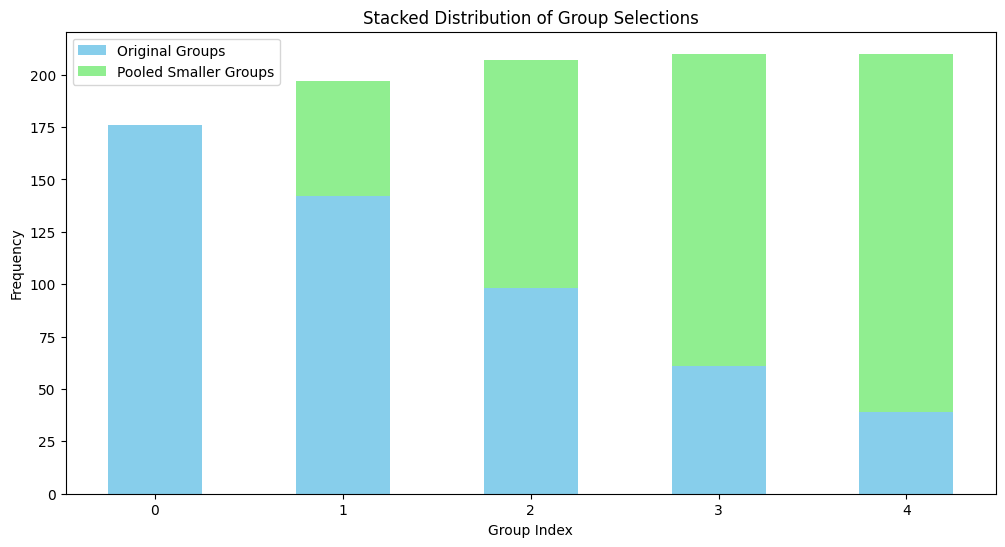

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters
ngroups = 5
probability_ratio = 1.5
base_prob = 1.0
group_size = 20
group_divider = 4

# Calculate the probabilities for each group
probabilities = []
total_prob = 0.0
for i in range(ngroups):
    prob = base_prob / (probability_ratio ** i)
    probabilities.append(prob)
    total_prob += prob

# Normalize the probabilities to sum to 1
probabilities = [prob / total_prob for prob in probabilities]

# Create the groups with randomized indices
groups = [random.sample(range(i * group_size, (i + 1) * group_size), group_size) for i in range(ngroups)]

# Create smaller groups for less probable groups
# Used to calibrate the optogenetic stimulation of less probable neurons in smaller groups (less synchrony)
smaller_groups = []
smaller_group_probabilities = []

highest_group_prob = probabilities[0] # Probability of the highest probability group

for i, group in enumerate(groups):
    if i == 0:  # Skip creating smaller groups for the highest probability group (first group)
        continue
    # Divide the group into smaller groups of size group_size / group_divider
    smaller_group_size = group_size // group_divider
    for j in range(group_divider):
        start_idx = j * smaller_group_size
        end_idx = start_idx + smaller_group_size
        smaller_group = group[start_idx:end_idx]
        smaller_groups.append(smaller_group)
        
        # Assign probability for each smaller group based on the given formula
        smaller_group_probability = (highest_group_prob - probabilities[i]) / group_divider
        smaller_group_probabilities.append(smaller_group_probability)

# Combine original group probabilities and smaller group probabilities
all_groups = groups[1:] + smaller_groups  # Exclude the highest probability group from being duplicated
all_probabilities = probabilities[1:] + smaller_group_probabilities

# Add the highest probability group back to the combined list
all_groups.insert(0, groups[0])
all_probabilities.insert(0, probabilities[0])

# Normalize all probabilities to sum to 1
total_prob_all = sum(all_probabilities)
all_probabilities = [prob / total_prob_all for prob in all_probabilities]

# Creating groups distribution according to their probabilities
def present_groups(groups, probabilities, n_presentations=1000):
    """
    This function simulates the presentation of groups based on their associated probabilities.
    It selects groups randomly, weighted by their respective probabilities, over a specified
    number of presentations.

    Args:
        groups (list): A list of groups to be presented.
        probabilities (list): A list of probabilities associated with each group.
        n_presentations (int): The number of times to present (select) a group.

    Returns:
        list: A list containing the indices representing the selected groups for each presentation.
    """
    return random.choices(range(len(groups)), weights=probabilities, k=n_presentations) # creates distribution of numbers based on the probabilities

# Present all groups
all_presentations = present_groups(all_groups, all_probabilities) # groups' numbers and their probabilities
#print(all_presentations)

# print the groups together with their probabilities in a table
for i, group in enumerate(all_groups):
    print(f"Group {i}: {group} - Probability: {all_probabilities[i]:.3f}")


# Calculate frequency counts for stacked bar chart
all_counts = np.bincount(all_presentations, minlength=len(all_groups)) # counts the number of appearance for each group
#print(all_counts)

# Split counts into original and pooled smaller groups
original_counts = all_counts[:ngroups] # Original groups - from index 0 to ngroups

# check the smaller groups indices slices
for i in range(ngroups - 1):
    start_idx = ngroups + i * group_divider
    end_idx = ngroups + (i + 1) * group_divider
    indices = list(range(start_idx, end_idx))
    group_sum = sum(all_counts[start_idx:end_idx])
    
    # Print the indices and the sum for each group
    print(f"Indices: {indices}, Sum: {group_sum}")

pooled_counts = [sum(all_counts[ngroups + i * group_divider:ngroups + (i + 1) * group_divider]) for i in range(ngroups - 1)]
pooled_counts = [0] + pooled_counts  # Add 0 for the highest probability group

# Plot stacked bar chart to show distribution
x = np.arange(ngroups)
width = 0.5

plt.figure(figsize=(12, 6))
plt.bar(x, original_counts, width, label='Original Groups', color='skyblue')
plt.bar(x, pooled_counts, width, bottom=original_counts, label='Pooled Smaller Groups', color='lightgreen')
plt.xlabel('Group Index')
plt.ylabel('Frequency')
plt.title('Stacked Distribution of Group Selections')
plt.xticks(x)
plt.legend()
plt.show()


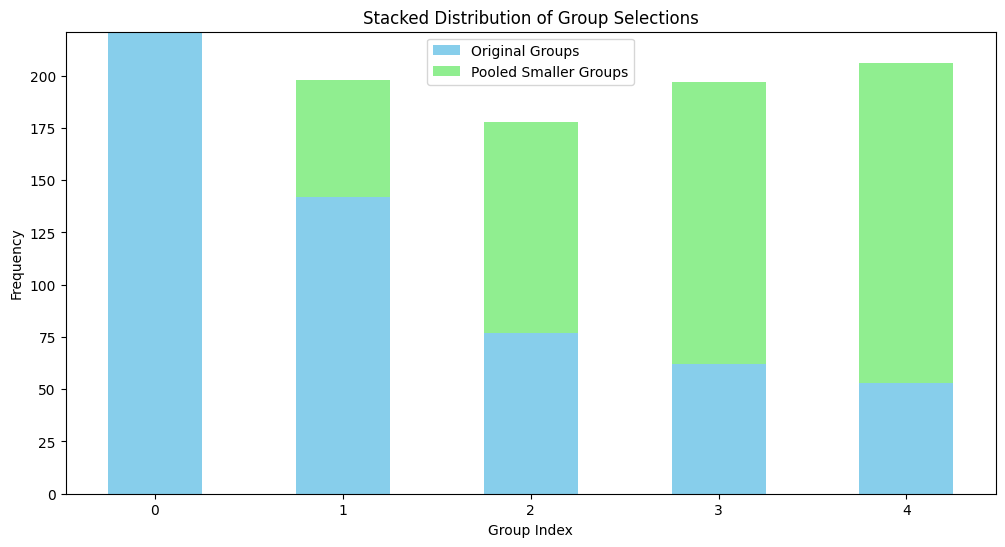

In [90]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters
ngroups = 5
probability_ratio = 1.5
base_prob = 1.0
group_size = 20
group_divider = 4

# Calculate the probabilities for each group
probabilities = []
total_prob = 0.0
for i in range(ngroups):
    prob = base_prob / (probability_ratio ** i)
    probabilities.append(prob)
    total_prob += prob

# Normalize the probabilities to sum to 1
probabilities = [prob / total_prob for prob in probabilities]

# Create the groups with randomized indices
groups = [random.sample(range(i * group_size, (i + 1) * group_size), group_size) for i in range(ngroups)]

# Create smaller groups for less probable groups
smaller_groups = []
smaller_group_probabilities = []

highest_group_prob = probabilities[0]

for i, group in enumerate(groups):
    if i == 0:  # Skip creating smaller groups for the highest probability group
        continue
    # Divide the group into smaller groups of size group_size / group_divider
    smaller_group_size = group_size // group_divider
    for j in range(group_divider):
        start_idx = j * smaller_group_size
        end_idx = start_idx + smaller_group_size
        smaller_group = group[start_idx:end_idx]
        smaller_groups.append(smaller_group)
        
        # Assign probability for each smaller group based on the given formula
        smaller_group_probability = (highest_group_prob - probabilities[i]) / group_divider
        smaller_group_probabilities.append(smaller_group_probability)

# Combine original group probabilities and smaller group probabilities
all_groups = groups[1:] + smaller_groups  # Exclude the highest probability group from being duplicated
all_probabilities = probabilities[1:] + smaller_group_probabilities

# Add the highest probability group back to the combined list
all_groups.insert(0, groups[0])
all_probabilities.insert(0, probabilities[0])

# Normalize all probabilities to sum to 1
total_prob_all = sum(all_probabilities)
all_probabilities = [prob / total_prob_all for prob in all_probabilities]

# Presenting groups according to their probabilities
def present_groups(groups, probabilities, n_presentations=1000):
    """
    This function simulates the presentation of groups based on their associated probabilities.
    It selects groups randomly, weighted by their respective probabilities, over a specified
    number of presentations.

    Args:
        groups (list): A list of groups to be presented.
        probabilities (list): A list of probabilities associated with each group.
        n_presentations (int): The number of times to present (select) a group.

    Returns:
        list: A list containing the indices representing the selected groups for each presentation.
    """
    presented_groups = []
    for _ in range(n_presentations):
        selected_group = random.choices(range(len(groups)), weights=probabilities, k=1)[0]
        presented_groups.append(selected_group)
    return presented_groups

# Present all groups
all_presentations = present_groups(all_groups, all_probabilities)

# Calculate frequency counts for stacked bar chart
all_counts = np.bincount(all_presentations, minlength=len(all_groups))

# Split counts into original and pooled smaller groups
original_counts = all_counts[:ngroups]
pooled_counts = [sum(all_counts[ngroups + i * group_divider:ngroups + (i + 1) * group_divider]) for i in range(ngroups - 1)]
pooled_counts = [0] + pooled_counts  # Add 0 for the highest probability group

# Plot stacked bar chart to show distribution
x = np.arange(ngroups)
width = 0.5

plt.figure(figsize=(12, 6))
plt.bar(x, original_counts, width, label='Original Groups', color='skyblue')
plt.bar(x, pooled_counts, width, bottom=original_counts, label='Pooled Smaller Groups', color='lightgreen')
plt.xlabel('Group Index')
plt.ylabel('Frequency')
plt.title('Stacked Distribution of Group Selections')
plt.xticks(x)
plt.legend()
plt.show()


In [5]:
import random

# test group division
all_cells = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39]
group_size = 16
group_divider = 2
groups_number = 2
groups = []

for _ in range(groups_number):
    group = random.sample(all_cells, group_size)
    groups.append(group)
    # Remove the selected cells to ensure no repeats
    for cell in group:
        all_cells.remove(cell)
    
# create one list of the remaining cells
print("created groups", groups)
remaining_cells = [all_cells]
print("remaining cells", remaining_cells)


created groups [[36, 14, 23, 27, 10, 9, 1, 37, 15, 13, 20, 28, 6, 24, 5, 35], [16, 29, 4, 2, 18, 3, 30, 12, 8, 34, 11, 7, 21, 32, 39, 25]]
remaining cells [[17, 19, 31, 38]]


In [7]:
sequence = [1, 8, 2, 0, 0, 0, 0, 1, 2, 1, 0, 4, 2, 0, 0, 0, 1, 2, 0, 0, 1, 8, 0, 0, 8, 0, 8, 3, 2, 7, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 6, 0, 0, 0, 3, 5, 7, 0, 0, 1, 2, 5, 8,
 8, 1, 6, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 7, 0, 1, 5, 1, 7, 0, 0, 1, 0, 0, 2, 8, 1, 1, 4, 2, 1, 0, 0, 2, 0, 2, 6, 7, 1, 0, 0, 0, 0, 7, 8, 2, 4, 7, 2, 2, 1, 1, 0, 1, 2, 1, 0, 4, 7, 0, 0, 0, 8, 2
, 2, 3, 6, 2, 0, 0, 0, 3, 3, 7, 1, 0, 0, 2, 6, 8, 0, 2, 0, 0, 0, 0, 5, 0, 2, 0, 0, 6, 4, 0, 1, 7, 3, 2, 7, 6, 4, 0, 1, 6, 2, 0, 0, 0, 0, 3, 7, 0, 0, 8, 5, 5, 6, 1, 1, 0, 2, 5, 4, 0, 2, 2, 0, 1, 3, 0,
2, 1, 0, 0, 5, 3, 0, 5, 2, 2, 2, 0, 1, 0, 0, 5, 2, 1, 0, 2, 2, 5, 7, 0, 0, 1, 8, 0, 5, 5, 2, 0, 2, 1, 1, 4, 0, 1, 7, 0, 2, 0, 1, 0, 8, 0, 0, 2, 7, 1, 8, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 6, 0, 4, 0, 5, 1,
 6, 0, 2, 2, 3, 0, 0, 1, 4, 7, 3, 1, 2, 0, 1, 2, 0, 0, 1, 7, 4, 8, 3, 1, 1, 1, 2, 0, 5, 0, 0, 0, 0, 2, 5, 0, 8, 0, 0, 3, 1, 3, 0, 0, 5, 0, 6, 0, 7, 3, 1, 0, 1, 7, 0, 6, 2, 8, 0, 1, 0, 2, 0, 6, 6, 0, 1
, 0, 2, 1, 0, 1, 0, 0, 1, 6, 0, 3, 8, 1, 2, 0, 1, 1, 2, 0, 0, 6, 0, 4, 2, 1, 6, 8, 6, 0, 1, 0, 3, 1, 6, 1, 0, 0, 0, 8, 0, 0, 0, 4, 1, 7, 0, 0, 1, 1, 0, 8, 6, 0, 0, 1, 2, 1, 2, 1, 1, 4, 1, 4, 2, 8, 0,
0, 0, 1, 0, 7, 0, 0, 0, 2, 6, 1, 1, 2, 4, 4, 0, 1, 6, 6, 7, 0, 0, 0, 5, 7, 1, 0, 4, 0, 5, 1, 8, 6, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 6, 0, 0, 0, 1, 8, 0, 1, 7, 0, 8, 7, 0, 6]

arduino_buffer = 18

# Divide the sequence into chunks of size buffer_size
for i in range(0, len(sequence), arduino_buffer):
    current_display_indices = sequence[i:i+arduino_buffer] 
    print(current_display_indices)


a = float(0.4)
# round a to the nearest integer
if a < 1:
    a = 1
for i in range(round(a)):
    print(i)

[1, 8, 2, 0, 0, 0, 0, 1, 2, 1, 0, 4, 2, 0, 0, 0, 1, 2]
[0, 0, 1, 8, 0, 0, 8, 0, 8, 3, 2, 7, 0, 0, 2, 2, 0, 1]
[0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 6, 0, 0, 0, 3, 5, 7, 0]
[0, 1, 2, 5, 8, 8, 1, 6, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0]
[0, 0, 0, 7, 0, 1, 5, 1, 7, 0, 0, 1, 0, 0, 2, 8, 1, 1]
[4, 2, 1, 0, 0, 2, 0, 2, 6, 7, 1, 0, 0, 0, 0, 7, 8, 2]
[4, 7, 2, 2, 1, 1, 0, 1, 2, 1, 0, 4, 7, 0, 0, 0, 8, 2]
[2, 3, 6, 2, 0, 0, 0, 3, 3, 7, 1, 0, 0, 2, 6, 8, 0, 2]
[0, 0, 0, 0, 5, 0, 2, 0, 0, 6, 4, 0, 1, 7, 3, 2, 7, 6]
[4, 0, 1, 6, 2, 0, 0, 0, 0, 3, 7, 0, 0, 8, 5, 5, 6, 1]
[1, 0, 2, 5, 4, 0, 2, 2, 0, 1, 3, 0, 2, 1, 0, 0, 5, 3]
[0, 5, 2, 2, 2, 0, 1, 0, 0, 5, 2, 1, 0, 2, 2, 5, 7, 0]
[0, 1, 8, 0, 5, 5, 2, 0, 2, 1, 1, 4, 0, 1, 7, 0, 2, 0]
[1, 0, 8, 0, 0, 2, 7, 1, 8, 0, 0, 0, 0, 1, 0, 0, 2, 1]
[3, 6, 0, 4, 0, 5, 1, 6, 0, 2, 2, 3, 0, 0, 1, 4, 7, 3]
[1, 2, 0, 1, 2, 0, 0, 1, 7, 4, 8, 3, 1, 1, 1, 2, 0, 5]
[0, 0, 0, 0, 2, 5, 0, 8, 0, 0, 3, 1, 3, 0, 0, 5, 0, 6]
[0, 7, 3, 1, 0, 1, 7, 0, 6, 2, 8, 0, 1, 0, 2, 0, 6, 6]
[0, 1, 0, 

In [15]:
import pickle
import os

directory = r"D:\DATA\Patterns\Test\Patt_2025-01-15\Protocols"
print("Contents of the directory:")
print(os.listdir(directory))

# Path to the .pkl file
file_path = r"D:\DATA\Patterns\Test\Patt_2025-01-15\Protocols\Protocol0.pkl"
# file exists?
if os.path.exists(file_path):
    print("File exists")
else:  
    print("File does not exist")
# is file readable?
if os.access(file_path, os.R_OK):
    print("File is readable")
else:
    print("File is not readable")


try:
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
    else:
        # Open and load the pickle file
        # with open(file_path, "rb") as file:
        #     data = pickle.load(file)
        
        with open(r"D:\DATA\Patterns\Test\Patt_2025-01-15\Protocols\Protocol0", "rb") as file:
            content = file.read(100)  # Read the first 100 bytes
        print(content)

        # Print the contents of the file
        # print("Contents of Protocol0:")
        # print(data)

except pickle.UnpicklingError:
    print(f"Error: The file {file_path} is not a valid pickle file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Contents of the directory:
['Protocol0']
File does not exist
File is not readable
File not found: D:\DATA\Patterns\Test\Patt_2025-01-15\Protocols\Protocol0.pkl


Major groups (size 7): [[20, 6, 15, 5, 10, 14, 16], [19, 7, 13, 18, 11, 2, 12], [3, 17, 8, 9, 1, 4, 21]]


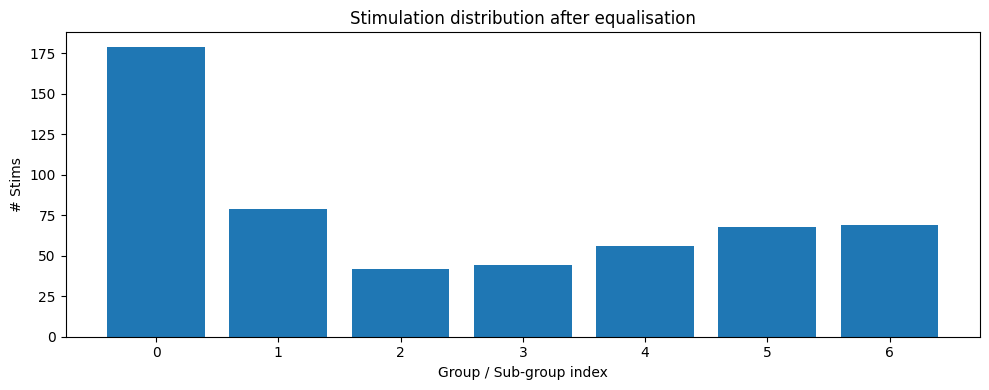

Generated sequence length: 537


In [2]:
import random, math, numpy as np
import matplotlib.pyplot as plt

def generate_equalised_stim_sequence(n_cells: int,
                                     group_size: int,
                                     subgroup_size: int,
                                     total_group_stims: int,
                                     m: int = 2,
                                     seed: int | None = None,
                                     show_plot: bool = True):
    """
    Build a stimulation sequence that equalises the per–cell stimulation count.

    Parameters
    ----------
    n_cells : int
        Total number of cells.
    group_size : int
        Number of cells in each *major* group.
    subgroup_size : int
        Number of cells inside each *sub-group* (for equalisation).
    total_group_stims : int
        Length of the initial stimulation vector (before equalisation).
    m : int, default ``2``
        Divider that sets how quickly probabilities fall across groups.
    seed : int or None, default ``None``
        Seed for the RNG (for reproducibility).
    show_plot : bool, default ``True``
        Whether to display a bar-plot of the final distribution.

    Returns
    -------
    list[int]
        Full stimulation sequence (major-group and sub-group indices).
    """
    rng = random.Random(seed)

    # 1️⃣  Create major groups from shuffled cell indices ---------------------
    shuffled_cells = list(range(1, n_cells + 1))
    rng.shuffle(shuffled_cells)

    k_major = math.ceil(n_cells / group_size)          # number of major groups
    major_groups = [shuffled_cells[i * group_size:(i + 1) * group_size]
                    for i in range(k_major)]
    print(f"Major groups (size {group_size}): {major_groups}")

    # 2️⃣  Assign probabilities (geometric fall-off by factor m) --------------
    base = sum(m ** (-i) for i in range(k_major))
    probs = [(m ** (-i)) / base for i in range(k_major)]  # highest for group 0

    # 3️⃣  Draw the initial stimulation sequence -----------------------------
    stim_seq = rng.choices(range(k_major), weights=probs, k=total_group_stims)

    # Convenience: count how many each major group already received
    from collections import Counter
    stim_counts = Counter(stim_seq)
    max_stims = max(stim_counts.values())              # count of group 0

    # 4️⃣  Equalise by splitting lower-prob groups into sub-groups ------------
    next_idx = k_major         # first unused index for sub-groups

    for g in range(1, k_major):
        current = stim_counts.get(g, 0)
        deficit = max_stims - current
        if deficit <= 0:
            continue

        # Split major group g into sub-groups of size `subgroup_size`
        g_cells = major_groups[g]
        n_sub = math.ceil(len(g_cells) / subgroup_size)
        sub_indices = list(range(next_idx, next_idx + n_sub))

        # Add the extra stimulations, randomly assigned across its sub-groups
        extra_stims = rng.choices(sub_indices, k=deficit)
        stim_seq.extend(extra_stims)
        next_idx += n_sub

    # Randomise final order so added stims are not lumped together
    rng.shuffle(stim_seq)

    if show_plot:
        # Final count for every index
        all_indices = sorted(set(stim_seq))
        final_counts = [stim_seq.count(i) for i in all_indices]

        plt.figure(figsize=(10, 4))
        plt.bar(all_indices, final_counts)
        plt.xlabel("Group / Sub-group index")
        plt.ylabel("# Stims")
        plt.title("Stimulation distribution after equalisation")
        plt.tight_layout()
        plt.show()

    return stim_seq

# ---------------------------------------------------------------------------
# Example usage
seq = generate_equalised_stim_sequence(n_cells=21,
                                       group_size=7,
                                       subgroup_size=4,
                                       total_group_stims=300,
                                       seed=42)
print(f"Generated sequence length: {len(seq)}")
